### GPU

In [1]:
!nvidia-smi

Thu Nov  7 21:09:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### deploying the image data..

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sujalthakkar","key":"f1c0c5709adf673907dc35bf54027e00"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d xenowing/10-food-classes-from-imagenet-dataset

Dataset URL: https://www.kaggle.com/datasets/xenowing/10-food-classes-from-imagenet-dataset
License(s): MIT
100% 779M/780M [00:43<00:00, 16.1MB/s]
100% 780M/780M [00:43<00:00, 18.9MB/s]


In [6]:
!unzip 10-food-classes-from-imagenet-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2179450.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2192365.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/219898.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2200219.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2208051.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2214152.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/221468.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2225690.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon/2231357.jpg  
  inflating: 10_food_classes_all_data/10_food_classes_all_data/train/

### 10 class food data...

```
Multi-Class Image Classification....

1) Become one with the data...
2) Preprocess the data (get it ready for a model)
3) Create a model (start with a baseline)
4) Fit the model (over-fit it to make sure it works..)
5) Evaluate the model
6) Adjust different hyper-paramters and improve the model (try to beat the baseline model/reduce the overfitting...)
7) Repeat until satisfied...

```

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import tensorflow as tf

```
This kaggle file does gives you 3 directory:

- 10 class food image 10% of the data
- 10 class food image 1% of the data
- 10 class food image whole data

Link of kaggle dataset : "https://www.kaggle.com/datasets/xenowing/10-food-classes-from-imagenet-dataset?select=10_food_classes_all_data"
```

In [8]:
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 1 directories and 0 images in /content/10_food_classes_10_percent
There are 2 directories and 0 images in /content/10_food_classes_10_percent/10_food_classes_10_percent
There are 10 directories and 0 images in /content/10_food_classes_10_percent/10_food_classes_10_percent/test
There are 0 directories and 250 images in /content/10_food_classes_10_percent/10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in /content/10_food_classes_10_percent/10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in /content/10_food_classes_10_percent/10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in /content/10_food_classes_10_percent/10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in /content/10_food_classes_10_percent/10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in /content/10_food_classes_10_percent/10_food_classes_10_perce

```
You can witness the different in the images in the training set of different class of food..
```

In [9]:
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_1_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 1 directories and 0 images in /content/10_food_classes_1_percent
There are 2 directories and 0 images in /content/10_food_classes_1_percent/10_food_classes_1_percent
There are 10 directories and 0 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test
There are 0 directories and 250 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test/chicken_wings
There are 0 directories and 250 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test/ramen
There are 0 directories and 250 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test/fried_rice
There are 0 directories and 250 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test/chicken_curry
There are 0 directories and 250 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test/grilled_salmon
There are 0 directories and 250 images in /content/10_food_classes_1_percent/10_food_classes_1_percent/test/sushi
The

```
Even in this case of 1% data we are just having 1% of the data in the training set the test set is still having 250 images...
```

In [10]:
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`")

There are 1 directories and 0 images in `/content/10_food_classes_all_data`
There are 2 directories and 0 images in `/content/10_food_classes_all_data/10_food_classes_all_data`
There are 10 directories and 0 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test`
There are 0 directories and 250 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test/chicken_wings`
There are 0 directories and 250 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test/ramen`
There are 0 directories and 250 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test/fried_rice`
There are 0 directories and 250 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test/chicken_curry`
There are 0 directories and 250 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test/grilled_salmon`
There are 0 directories and 250 images in `/content/10_food_classes_all_data/10_food_classes_all_data/test/sushi`
Th

```
So we got data which looks like this ....

Training:

- Chicken Curry
- Chicken Wings
- Fried Rice
- Grilled Salmon
- Hamburger
- Ice Cream
- Pizza
- Pizza
- Ramen
- Steak
- Sushi

These are our 10 classes of Food images and each class is having 750 images... inside the training set...

and inside the test set each class is having 250 images of each food class.
```

```
We are working right now with the All data for 10 class of FOod images.
```

In [11]:
### Setup the train and test directories...
train_dir = "/content/10_food_classes_all_data/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/10_food_classes_all_data/test"
#/content/10_food_classes_all_data/10_food_classes_all_data/test

In [12]:
#lets get the sub directories
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [13]:
len(class_names)

10

In [14]:
## let's fetcht the helper function file from github
!wget https://raw.githubusercontent.com/TSujal/Food-Image-Recognition-Using-Deep-learning-and-Transfer-Learning/refs/heads/main/helper_functions_food_image.py

--2024-11-07 21:11:01--  https://raw.githubusercontent.com/TSujal/Food-Image-Recognition-Using-Deep-learning-and-Transfer-Learning/refs/heads/main/helper_functions_food_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1912 (1.9K) [text/plain]
Saving to: ‘helper_functions_food_image.py’

helper_functions_fo 100%[===================>]   1.87K  --.-KB/s    in 0s      

2024-11-07 21:11:02 (33.3 MB/s) - ‘helper_functions_food_image.py’ saved [1912/1912]



In [15]:
from helper_functions_food_image import view_random_image, plot_loss_curves, load_and_predict

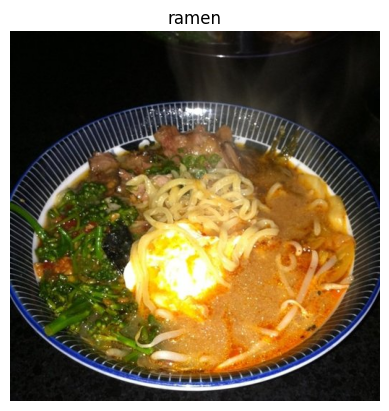

Image shape: (512, 512, 3)


In [16]:
#lets fetch and see the images
import random
img = view_random_image(target_dir=train_dir+"/",
                        target_class=random.choice(class_names))

```
Visualizing the couple of images we are now a bit familiar with the data...

Things we notice ::

- The shape of each and every image is different so we need to fix it before we feed into a neural network...

- Not sure about the dtype of the images but if its not float32 we need to do that by converting the array between [0,1] as neural network likes numbers between 0 and 1..
```

### Let's preprocess it...

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [18]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


```
750 images per class so total we get 7.5k data in training

and same for test, as we have 250 images per class, thus make it 2.5k images..
```

### Model 1 : Multi class CNN model..

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, MaxPooling2D,Dense,Dropout,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import L2,L1

In [20]:
# Define the model
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", activation="relu",
           kernel_regularizer=L2(0.01), input_shape=(224, 224, 3)),
    BatchNormalization(),

    Conv2D(32, kernel_size=3, strides=1, padding="valid", activation="relu",
           kernel_regularizer=L2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),  # Add pooling here

    Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer=L2(0.01)),
    BatchNormalization(),

    Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer=L2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),  # Add another pooling layer

    GlobalAveragePooling2D(),  # Only one pooling layer before flattening
    Dropout(0.25),

    Flatten(),
    Dense(32, activation="relu", kernel_regularizer=L2(0.01)),
    Dense(16, activation="relu", kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Dense(10, activation="softmax")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 108, 108, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 106, 106, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,970 (120.98 KB)

 Trainable params: 30,682 (119.85 KB)

 Non-trainable params: 288 (1.12 KB)

In [22]:
len(train_data),len(test_data)

(235, 79)

In [23]:
model_1.compile(loss ="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#//remember : optimizer is correct, optimizers is not correct//

In [24]:
7500//32,2500//32

(234, 78)

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                            patience=5)
adjust_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                 factor=0.3,
                                                 patience=1,
                                                 min_lr=1e-7
                                                 )

In [26]:
history_1 = model_1.fit(
    train_data,  # training data
    epochs=85,  # number of epochs
    validation_data=test_data,  # test data for validation
    callbacks = [adjust_lr]
    )

Epoch 1/85


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 187ms/step - accuracy: 0.1780 - loss: 3.2319 - val_accuracy: 0.1420 - val_loss: 3.1281 - learning_rate: 0.0010
Epoch 2/85
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.2793 - loss: 2.6657 - val_accuracy: 0.1396 - val_loss: 2.8196 - learning_rate: 0.0010
Epoch 3/85
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.3261 - loss: 2.3984 - val_accuracy: 0.3096 - val_loss: 2.3682 - learning_rate: 3.0000e-04
Epoch 4/85
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.3511 - loss: 2.2890 - val_accuracy: 0.3700 - val_loss: 2.2361 - learning_rate: 3.0000e-04
Epoch 5/85
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 128ms/step - accuracy: 0.3735 - loss: 2.2109 - val_accuracy: 0.3856 - val_loss: 2.1484 - learning_rate: 3.0000e-04
Epoch 6/85
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.3897 - loss: 2.1187 - val_accuracy: 0.3944 - val_loss: 2.0919 - learning_rate: 3.0000e-04
Epoch 7/85
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 128ms/step - accuracy

#### Evaluate the model_1

In [27]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.5574 - loss: 1.5579


[1.5754590034484863, 0.5580000281333923]

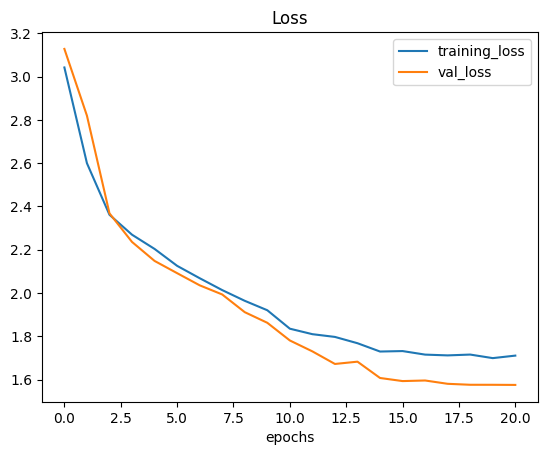

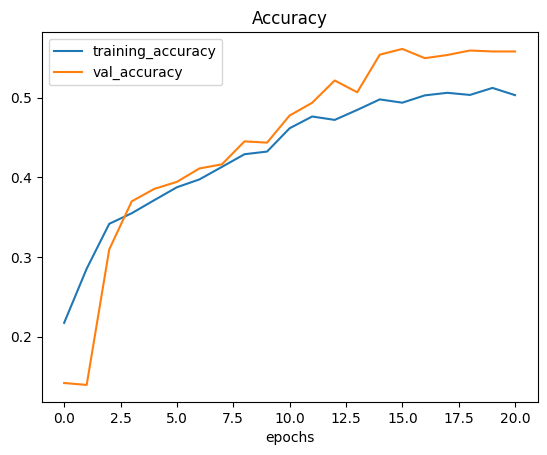

In [28]:
#let's plot the loss curves which we already have built the function in the helper function
plot_loss_curves(history_1)

### Model 2:


```
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation = "relu",
                           kernel_regularizer = L2(0.01),
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(64,3,activation="relu",
                           kernel_regularizer = L2(0.01)),
    #BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(128,3,activation="relu",
                           kernel_regularizer = L2(0.01)),
    tf.keras.layers.Conv2D(256,3,activation="relu",
                           kernel_regularizer= L2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu",kernel_regularizer= L2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(64,activation="relu",kernel_regularizer= L2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    tf.keras.layers.Dense(32,activation="relu",kernel_regularizer= L2(0.001)),
    #BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
])


This model was overfitting so we tried replicating the model_1 of version_1


look this:
```
![model_2_version_2_overfit_food10.png](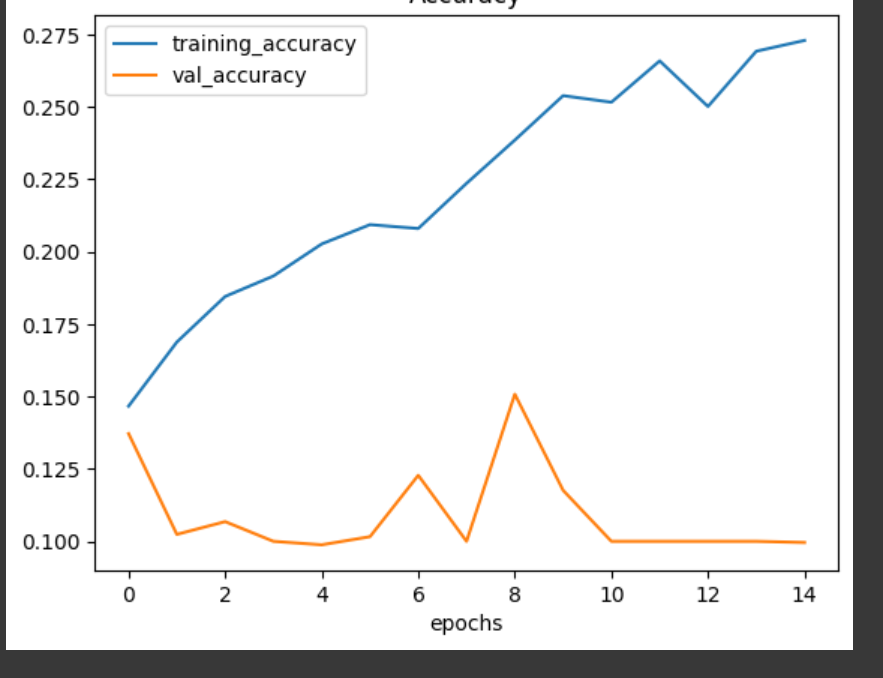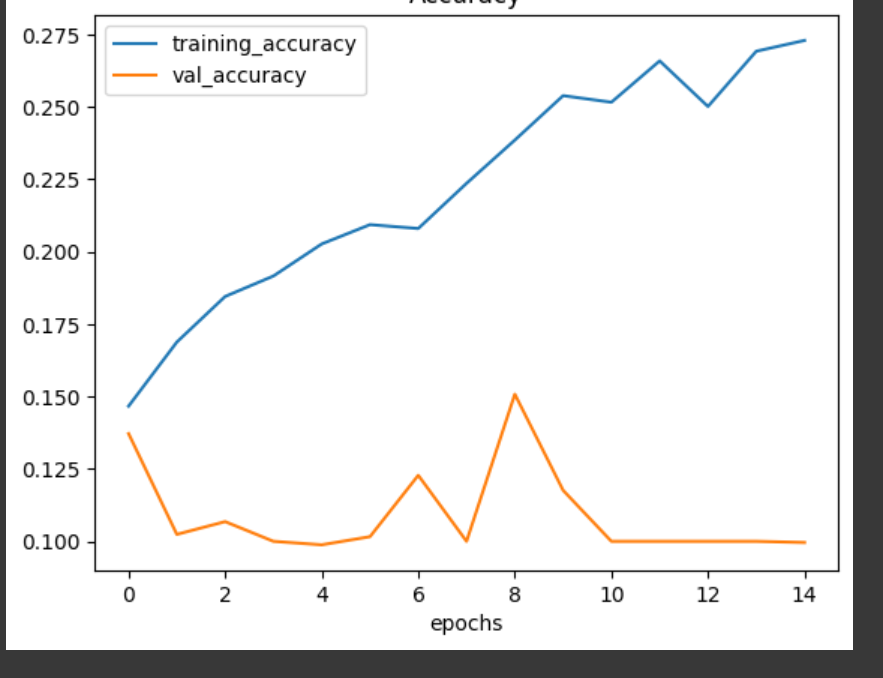)

In [29]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.regularizers import L1, L2
import tensorflow as tf

model_2 = tf.keras.Sequential([
    Conv2D(
        filters=16,
        kernel_size=3,
        activation="relu",
        kernel_regularizer=L2(0.1),
        input_shape=(224, 224, 3)
    ),
    Conv2D(16, 3, activation="relu", kernel_regularizer=L2(0.001)),
    MaxPooling2D(pool_size=2, padding="valid"),  # Added pooling layer
    Conv2D(32, 3, activation="relu", kernel_regularizer=L2(0.01)),  # Increased filters
    Conv2D(32, 3, activation="relu", kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    GlobalAveragePooling2D(),  # Use this only once
    BatchNormalization(),  # Place before the flattening layer
    Flatten(),
    Dense(32, activation="relu"),
    Dense(16, activation="relu", kernel_regularizer=L1(0.01)),
    Dense(10, activation="softmax")  # Ensure this matches your number of classes
])


In [30]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 106, 106, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,538 (72.41 KB)

 Trainable params: 18,474 (72.16 KB)

 Non-trainable params: 64 (256.00 B)

In [31]:
model_2.compile(
                loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

In [32]:
history_2 = model_2.fit(
                        train_data,
                        epochs=45,
                        validation_data=test_data,
                        callbacks=[early_stop,adjust_lr]
                        )

Epoch 1/45
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 157ms/step - accuracy: 0.1540 - loss: 3.3420 - val_accuracy: 0.1540 - val_loss: 2.5662 - learning_rate: 0.0010
Epoch 2/45
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.1942 - loss: 2.4208 - val_accuracy: 0.2016 - val_loss: 2.3347 - learning_rate: 0.0010
Epoch 3/45
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.2169 - loss: 2.2633 - val_accuracy: 0.2124 - val_loss: 2.2484 - learning_rate: 0.0010
Epoch 4/45
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.2381 - loss: 2.2044 - val_accuracy: 0.2320 - val_loss: 2.2450 - learning_rate: 0.0010
Epoch 5/45
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.2348 - loss: 2.1903 - val_accuracy: 0.2056 - val_loss: 2.2689 - learning_rate: 0.0010


#### evaluate the model_2

In [33]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.2152 - loss: 2.2469


[2.268866539001465, 0.20559999346733093]

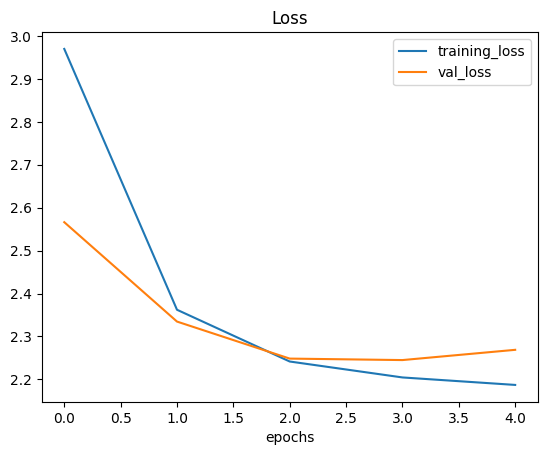

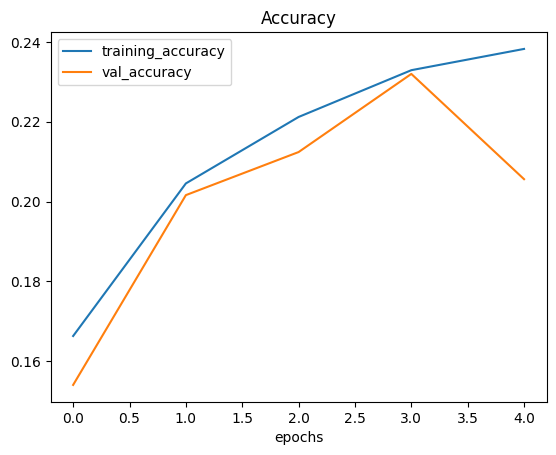

In [34]:
plot_loss_curves(history_2)

### Model 3

In [47]:
model_3 = tf.keras.Sequential([
    Conv2D(16,kernel_size=3,strides=1, padding="valid",activation="relu",kernel_regularizer=L2(0.01),input_shape=(224,224,3)),
    Conv2D(16,3,activation="relu",kernel_regularizer = L2(0.01)),
    Conv2D(16,3,activation="relu",kernel_regularizer=L2(0.01)),
    #GlobalAveragePooling2D(),

    MaxPool2D(2),
    Dropout(0.15),
    Conv2D(32,3,activation="relu",kernel_regularizer=L2(0.01)),
    Conv2D(32,3,activation="relu",kernel_regularizer=L2(0.001)),
    Conv2D(32,3,activation="relu",kernel_regularizer=L2(0.01)),

    BatchNormalization(),
    Dropout(0.2),
    MaxPool2D(2),
    GlobalAveragePooling2D(),
    #Dropout(0.15),
    Flatten(),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(10,activation="softmax")
])

In [48]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 218, 218, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 107, 107, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 105, 105, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 103, 103, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 103, 103, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 103, 103, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 51, 51, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,106 (117.60 KB)

 Trainable params: 30,042 (117.35 KB)

 Non-trainable params: 64 (256.00 B)

In [49]:
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [50]:
train_data.samples, train_data.batch_size, train_data.samples//train_data.batch_size

(7500, 32, 234)

In [51]:
history_3 = model_3.fit(
                        train_data,
                        epochs=30,
                        validation_data=test_data,
                        callbacks=[early_stop,adjust_lr]
                        )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 208ms/step - accuracy: 0.1044 - loss: 2.7322 - val_accuracy: 0.1604 - val_loss: 2.3116 - learning_rate: 0.0010
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.1738 - loss: 2.2654 - val_accuracy: 0.1672 - val_loss: 2.2338 - learning_rate: 0.0010
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.1745 - loss: 2.2195 - val_accuracy: 0.1204 - val_loss: 2.5345 - learning_rate: 0.0010
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - accuracy: 0.1876 - loss: 2.1911 - val_accuracy: 0.1196 - val_loss: 2.3037 - learning_rate: 3.0000e-04
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 145ms/step - accuracy: 0.2009 - loss: 2.1728 - val_accuracy: 0.1476 - val_loss: 2.2963 - learning_rate: 9.0000e-05


#### Evaluate the model_3

In [52]:
model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.1510 - loss: 2.3040


[2.296315908432007, 0.147599995136261]

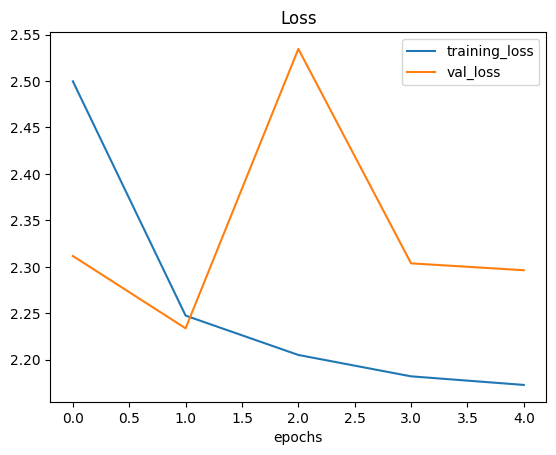

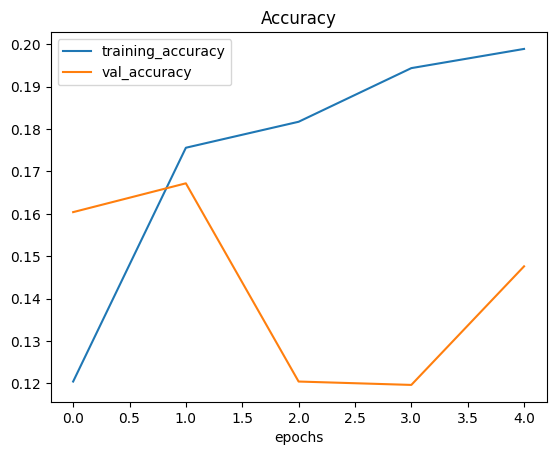

In [53]:
plot_loss_curves(history_3)

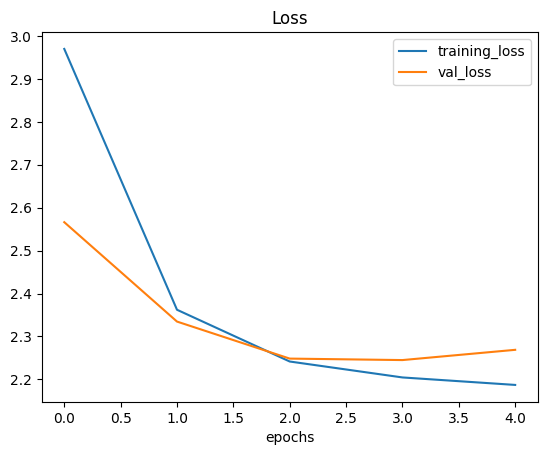

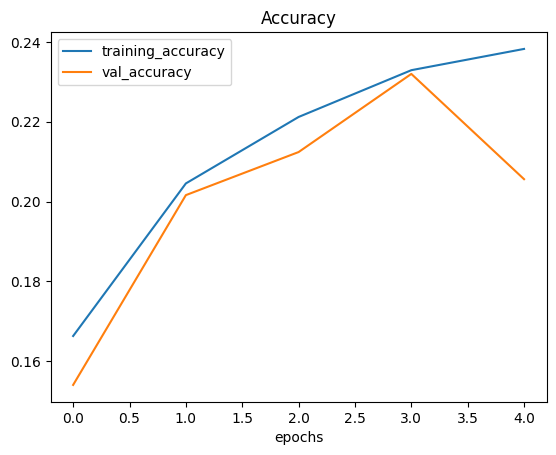

In [55]:
plot_loss_curves(history_2)

In [54]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.1908 - loss: 2.2927


[2.268866777420044, 0.20559999346733093]


**Does our model is overfitting ??**
```
Steps to inculcate to reduce overfitting the model...

* Get more data : having more data gives a model more opportunity to learn on diverse patterns...

* Simplify the model : If our current model is overfitting the data, it may be too complicated so try and reduce the complexity....

* we could use DATA AUGMENTATION methology to increase the training data diversity ....


* Based on the models perscpective :
  ** we could improve it by:
   - Reducing the number of layers.
   - Decrease the number of hidden units
   - Change the activation functions
   - Change the optimization functions.
   - Change the learning rate..
   - Fitting on more data
   - Fitting for longer ie more epochs..

* Or can also use TRANSFER LEARNING technique where we do implement already existing model who have already learned on some particular data and now we use those models to train n let them learn upon our own data....

```


### Model 4 : simplifying the model

```
Lets simplify the model and witness the performance of the model is it performing better or worse....
```

In [56]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,3,activation="relu",input_shape=(224,224,3),kernel_regularizer = L2(0.01)),
    Conv2D(16,3,activation="relu",kernel_regularizer=L2(0.01)),
    #Conv2D(16,3,activation="relu",kernel_regularizer=L2(0.01)),
    #Conv2D(6,3,activation="relu",kernel_regularizer=L2(0.01)),

    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    #tf.keras.layers.Conv2D(24,3,activation="relu",kernel_regularizer=L2(0.001)),
    tf.keras.layers.Conv2D(32,3,activation="relu",kernel_regularizer=L2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_4.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 108, 108, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 54, 54, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │       2,986,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,994,250 (11.42 MB)

 Trainable params: 2,994,186 (11.42 MB)

 Non-trainable params: 64 (256.00 B)

In [57]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 218, 218, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 107, 107, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 105, 105, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 103, 103, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 103, 103, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 103, 103, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 51, 51, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,192 (352.32 KB)

 Trainable params: 30,042 (117.35 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 60,086 (234.71 KB)

In [58]:
history_4 = model_4.fit(train_data,
                        epochs=55,
                        #steps_per_epoch=train_data.samples // train_data.batch_size,
                        validation_data=test_data,
                        #validation_steps=test_data.samples // test_data.batch_size,
                        callbacks=[early_stop,adjust_lr]
                        )

Epoch 1/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 138ms/step - accuracy: 0.1395 - loss: 3.0070 - val_accuracy: 0.1264 - val_loss: 2.4863 - learning_rate: 0.0010
Epoch 2/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 130ms/step - accuracy: 0.2569 - loss: 2.2707 - val_accuracy: 0.1672 - val_loss: 2.4798 - learning_rate: 0.0010
Epoch 3/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 118ms/step - accuracy: 0.3211 - loss: 2.0450 - val_accuracy: 0.1956 - val_loss: 2.5036 - learning_rate: 0.0010
Epoch 4/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.4210 - loss: 1.7368 - val_accuracy: 0.2076 - val_loss: 2.6523 - learning_rate: 0.0010
Epoch 5/55
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - accuracy: 0.5567 - loss: 1.3781 - val_accuracy: 0.2724 - val_loss: 2.3724 - learning_rate: 0.0010


In [59]:
model_4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.2663 - loss: 2.3743


[2.3723859786987305, 0.27239999175071716]

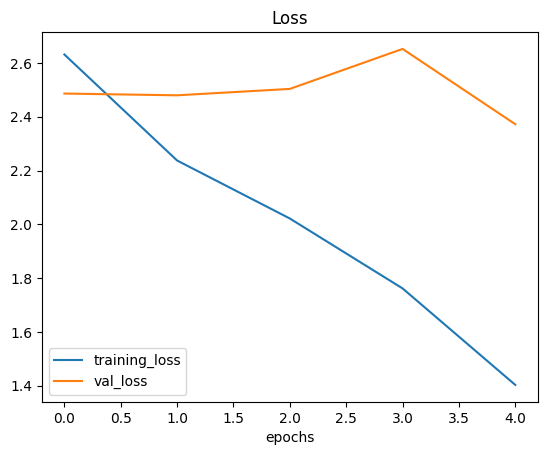

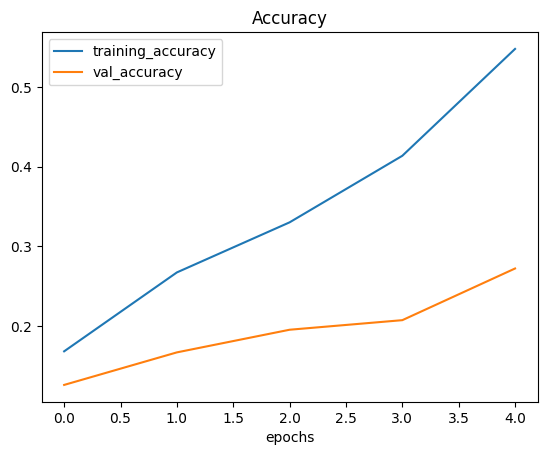

In [60]:
plot_loss_curves(history_4)

In [61]:
model_3.evaluate(test_data) #check how was our last model performance

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.1485 - loss: 2.3018


[2.296315908432007, 0.147599995136261]

In [ ]:
plot_loss_curves(history_3)

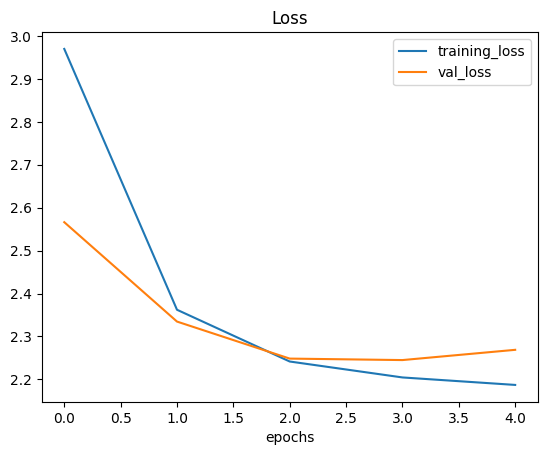

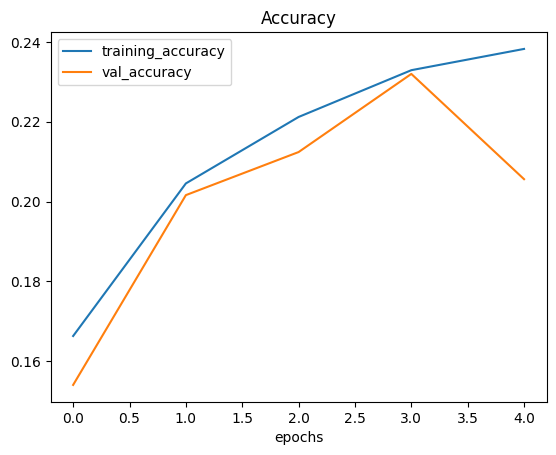

In [63]:
plot_loss_curves(history_2)

### Data Augmentations....

In [64]:
train_datagenerator = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2,
                                         zoom_range=0.3,
                                         width_shift_range=0.2,
                                         height_shift_range=0.3,
                                         horizontal_flip=True
                                         )#shuffle is true by default

train_data_augmented = train_datagenerator.flow_from_directory(train_dir,
                                                              target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [65]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 108, 108, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 106, 106, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,336 (360.69 KB)

 Trainable params: 30,682 (119.85 KB)

 Non-trainable params: 288 (1.12 KB)

 Optimizer params: 61,366 (239.71 KB)

In [66]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 106, 106, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,488 (216.75 KB)

 Trainable params: 18,474 (72.16 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 36,950 (144.34 KB)

In [67]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 218, 218, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 107, 107, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 105, 105, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 103, 103, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 103, 103, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 103, 103, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 51, 51, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,192 (352.32 KB)

 Trainable params: 30,042 (117.35 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 60,086 (234.71 KB)

In [68]:
model_4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 220, 220, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 108, 108, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 54, 54, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │       2,986,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,982,624 (34.27 MB)

 Trainable params: 2,994,186 (11.42 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 5,988,374 (22.84 MB)

In [69]:
### let's replicate the Tiny VGG model and witness the accuracy change....

```
Conv2D(16)
Conv2D(16)
Pooling()
Conv2D(32)
Conv2D(32)
Pooling()
Conv2D(64)
Conv2D(64)
Pooling()
FCL(128)
DENSE(10) #output



```

In [ ]:
#lets replicate the above model here...
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation="relu",kernel_regularizer=L2(0.01)),
    tf.keras.layers.MaxPool2D(),
    #tf.keras.layers.Conv2D(32,3,activation="relu",kernel_regularizer=L2(0.01)),
    #tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16,3,activation="relu"),
    tf.keras.layers.Conv2D(16,3,activation="relu",kernel_regularizer=L2(0.01)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(128,activation="relu"),
    #tf.keras.layers.Dense(10,activation="softmax"),
    #Flatten
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu")
])

model_5.summary()

In [76]:
model_5.compile(
                loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
              )

In [ ]:
history_5 = model_5.fit(
                        train_data_augmented,
                        epochs=25,
                        #steps_per_epoch=train_data_augmented.samples // train_data.batch_size,
                        validation_data=test_data,
                        #validation_steps=test_data.samples // test_data.batch_size
                        callbacks=[early_stop,djust_lr]
                        )

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 446ms/step - accuracy: 0.1882 - loss: 4.8269 - val_accuracy: 0.1964 - val_loss: 4.7709 - learning_rate: 0.0010
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 443ms/step - accuracy: 0.2003 - loss: 4.8284 - val_accuracy: 0.2256 - val_loss: 4.7409 - learning_rate: 0.0010
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 441ms/step - accuracy: 0.1881 - loss: 4.8696 - val_accuracy: 0.2076 - val_loss: 4.7737 - learning_rate: 0.0010
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 441ms/step - accuracy: 0.2013 - loss: 4.7196 - val_accuracy: 0.2400 - val_loss: 4.7336 - learning_rate: 3.0000e-04
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 455ms/step - accuracy: 0.2075 - loss: 4.8227 - val_accuracy: 0.2296 - val_loss: 4.7247 - learning_rate: 3.0000e-04
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 439ms/step - accuracy: 0.2028 - loss: 4.8211 - val_accuracy: 0.2376 - val_loss: 4.7242 - learning_rate: 9.0000e-05
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 438ms/s

In [ ]:
plot_loss_curves(history_5)

### let's test on internet images..



In [ ]:
class_names

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

In [ ]:
import matplotlib.image as mpimg
img_steak = mpimg.imread("/content/hamburger.jpg")
plt.imshow(img_steak)
plt.axis("off")
plt.show()

In [ ]:
from helper_functions_food_image import load_and_predict

In [ ]:
img_piz = image.load_img("/content/hamburger.jpg",target_size=(224,224))
img_arr = image.img_to_array(img_piz)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.0

predict_p = model_1.predict(img_arr)
confidence = predict_p[0][0] * 100
if confidence > 0.5:
  print(f"Prediction: HB with {confidence:.2f}% confidence")
else:
  print(f"Prediction: HB with {100 - confidence:.2f}% confidence")

In [ ]:

def predict_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class
  """

  img = load_and_predict(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
ice = load_and_predict("/content/hamburger.jpg")
ice.shape, ice

In [ ]:
#model_1.predict(tf.expand_dims(ice))

In [ ]:
predict = model_1.predict(tf.expand_dims(ice,axis=0))
predict_class = class_names[int(tf.round(predict))]
predict_class

In [ ]:
predict_plot(model_1,"/content/hamburger.jpg")